In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.utils import plot_model, to_categorical

Using TensorFlow backend.


In [2]:
df = pd.read_csv("FX_MA_25days.csv")
df.head()

,time,open,high,low,close,25mean,target
0,2016-12-05 07:00:00,113.320,114.777,112.876,113.852,109.25760,1
1,2016-12-06 07:00:00,113.841,114.188,113.504,114.018,109.65224,1
2,2016-12-07 07:00:00,114.029,114.404,113.416,113.760,110.07040,1
3,2016-12-08 07:00:00,113.805,114.378,113.120,114.030,110.51248,1
4,2016-12-09 07:00:00,114.030,115.368,114.012,115.320,111.00024,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 7 columns):
time      769 non-null object
open      769 non-null float64
high      769 non-null float64
low       769 non-null float64
close     769 non-null float64
25mean    769 non-null float64
target    769 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 42.2+ KB


In [4]:
split_data = '2019-05-06 06:00:00'
train, test = df[df['time'] < split_data], df[df['time'] >= split_data]

In [5]:
train = train.set_index('time')
test = test.set_index('time')

In [6]:
X_train = train.iloc[:,:5]
Y_train = train['target']

X_test = test.iloc[:,:5]
Y_test = test['target']

In [7]:
X_train = X_train.as_matrix()
print(X_train)
print("Data len: ",len(X_train))

X_test = X_test.as_matrix()
print(X_train)
print("Data len: ",len(X_test))

# 正規化
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)

ms = MinMaxScaler()
X_test = ms.fit_transform(X_test)

[[113.32    114.777   112.876   113.852   109.2576 ]
 [113.841   114.188   113.504   114.018   109.65224]
 [114.029   114.404   113.416   113.76    110.0704 ]
 ...
 [111.425   111.613   111.05    111.385   111.63984]
 [111.382   111.666   111.354   111.51    111.66624]
 [111.518   111.695   111.07    111.096   111.65608]]
Data len:  630
[[113.32    114.777   112.876   113.852   109.2576 ]
 [113.841   114.188   113.504   114.018   109.65224]
 [114.029   114.404   113.416   113.76    110.0704 ]
 ...
 [111.425   111.613   111.05    111.385   111.63984]
 [111.382   111.666   111.354   111.51    111.66624]
 [111.518   111.695   111.07    111.096   111.65608]]
Data len:  139


/home/tim0114gap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/tim0114gap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [8]:
c = np.array(Y_train)
print("Y_train Target len: ",len(Y_train))

Y_test = np.array(Y_test)
print("Y_train Target len: ",len(Y_test))

Y_train Target len:  630
Y_train Target len:  139


In [9]:
maxlen = 25
dataTrain = []
targetTrain = []
for i in range(0, len(X_train) - maxlen):
    dataTrain.append(X_train[i: i + maxlen])
    targetTrain.append(Y_train[i + maxlen])

dataTest = []
targetTest = []
for i in range(0, len(X_test) - maxlen):
    dataTest.append(X_test[i: i + maxlen])
    targetTest.append(Y_test[i + maxlen])

In [10]:
X_train = np.array(dataTrain)
Y_train = np.array(targetTrain)

X_test = np.array(dataTest)
Y_test = np.array(targetTest)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(605, 25, 5)
(605,)
(114, 25, 5)
(114,)


In [11]:
# Y_train = Y_train.reshape(len(Y_train), 1)
# Y_test = Y_test.reshape(len(Y_test), 1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(605, 25, 5)
(605, 2)
(114, 25, 5)
(114, 2)


In [13]:
'''
モデル設定
'''
length_of_sequence = X_train.shape[1]  # 入力層
in_out_neurons = 2                     # 出力層 
n_hidden = 100                         # 隠れ層 

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, 5), return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Activation("sigmoid"))
model.add(Dense(in_out_neurons))
model.add(Activation("softmax"))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer, metrics=['acc'])

In [15]:
#plot_model(model, to_file='model.png')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               42400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 47,552
Trainable params: 47,552
Non-trainable params: 0
_________________________________________________________________


In [16]:
# コールバック指定（https://qiita.com/yukiB/items/f45f0f71bc9739830002）
early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='auto', patience=20)
history = model.fit(X_train, Y_train,
                  batch_size = 16, # 論文で使われるのが1, 32, 128, 256, 512
                  epochs=200,
                  validation_split=0.2,
                  callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 484 samples, validate on 121 samples
Epoch 1/200
484/484 [==============================] - 2s 5ms/step - loss: 0.6957 - acc: 0.5103 - val_loss: 0.6660 - val_acc: 0.7521
Epoch 2/200
484/484 [==============================] - 1s 2ms/step - loss: 0.6552 - acc: 0.6054 - val_loss: 0.6536 - val_acc: 0.5289
Epoch 3/200
484/484 [==============================] - 1s 2ms/step - loss: 0.6621 - acc: 0.5930 - val_loss: 0.6145 - val_acc: 0.7769
Epoch 4/200
484/484 [==============================] - 1s 2ms/step - loss: 0.5447 - acc: 0.7645 - val_loss: 0.7121 - val_acc: 0.6777
Epoch 5/200
484/484 [==============================] - 1s 2ms/step - loss: 0.5039 - acc: 0.7831 - val_loss: 0.4591 - val_acc: 0.8678
Epoch 6/200
484/484 [==============================] - 1s 2ms/step - loss: 0.4196 - acc: 0.8347 - val_loss: 0.3268 - val_acc: 0.8843
Epoch 7/200
484/484 [==============================] - 1s 2ms/

484/484 [==============================] - 1s 2ms/step - loss: 0.2408 - acc: 0.8946 - val_loss: 0.3277 - val_acc: 0.8347
Epoch 60/200
484/484 [==============================] - 1s 2ms/step - loss: 0.2149 - acc: 0.9029 - val_loss: 0.3347 - val_acc: 0.8760
Epoch 61/200
484/484 [==============================] - 1s 2ms/step - loss: 0.2288 - acc: 0.9008 - val_loss: 0.3658 - val_acc: 0.7934


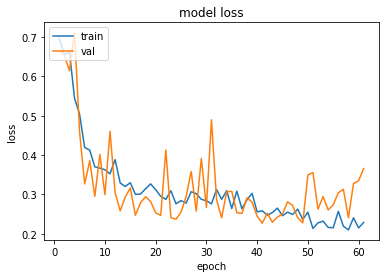

In [17]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

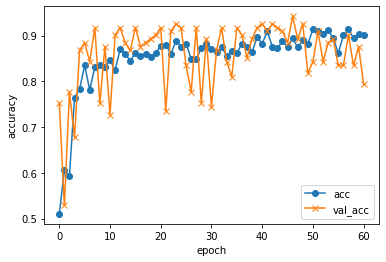

In [18]:
#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#Final.pngという名前で、結果を保存
# plt.savefig('Final.png')
# plt.show()

In [19]:
print("Test accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

114/114 [==============================] - 0s 357us/step
Test accuracy: 0.7719


In [20]:
predict_classes = model.predict_classes(X_test)

In [21]:
Y_test = np.array([np.argmax(x) for x in Y_test])

In [22]:
pd.crosstab(Y_test, predict_classes, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,33,26,59
1,0,55,55
All,33,81,114
